## AI Machine Learning - Classificação

### Resolução TP1
----

### QUESTÕES TEÓRICAS

### 1. O que significa "pureza dos dados" em um nó de uma árvore de decisão? Por que ela é importante na construção da árvore?

Pureza dos dados refere-se ao grau em que os dados de um nó pertencem a uma única classe.  
Um nó é considerado puro se todos os exemplos dentro dele são da mesma classe.  
Durante a construção da árvore, maximizar a pureza dos nós é importante porque significa que o modelo está segmentando corretamente os dados em grupos homogêneos, o que leva a decisões mais precisas.

---

### 2. Suponha que uma árvore de decisão atinge 100% de acurácia no conjunto de treino, mas desempenho ruim no teste. O que pode estar acontecendo?

Provavelmente está ocorrendo **overfitting**.  
A árvore de decisão aprendeu padrões muito específicos dos dados de treino, inclusive ruídos, e perdeu a capacidade de generalizar para novos dados.

---

### 3. Quais cuidados devem ser tomados no pré-processamento dos dados antes de treinar uma árvore de decisão? Comente sobre normalização, tratamento de variáveis categóricas e outliers.

- **Normalização**: não é necessária para árvores de decisão.
- **Variáveis categóricas**: podem ser usadas diretamente ou codificadas (ex: one-hot encoding).
- **Outliers**: árvores são robustas a outliers, mas dependendo do contexto pode ser interessante tratar outliers extremos.

---

### 4. Explique o que é pruning em árvores de decisão e por que ele é importante. Comente como o pruning pode afetar o equilíbrio entre a complexidade do modelo e sua capacidade de generalização.

**Pruning** é o processo de remover ramos da árvore que têm pouca relevância para melhorar a capacidade de generalização.  
Ele reduz a complexidade do modelo, evita overfitting e promove melhor desempenho em dados novos.


### QUESTÕES PRÁTICAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

### 1. Carregue o dataset do Titanic e prepare os dados

In [2]:
# Carregar dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Seleção de variáveis
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Fare']
X = df[features]
y = df['Survived']

# Tratamento de valores faltantes
X['Age'].fillna(X['Age'].median(), inplace=True)

# Codificação de variável categórica
X['Sex'] = LabelEncoder().fit_transform(X['Sex'])

# Separar treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipykernel_12903/1689108788.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].median(), inplace=True)
/tmp/ipykernel_12903/1689108788.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = LabelEncoder().fit_transform(X['Sex'])


### 2. Treine uma árvore de decisão e visualize a estrutura

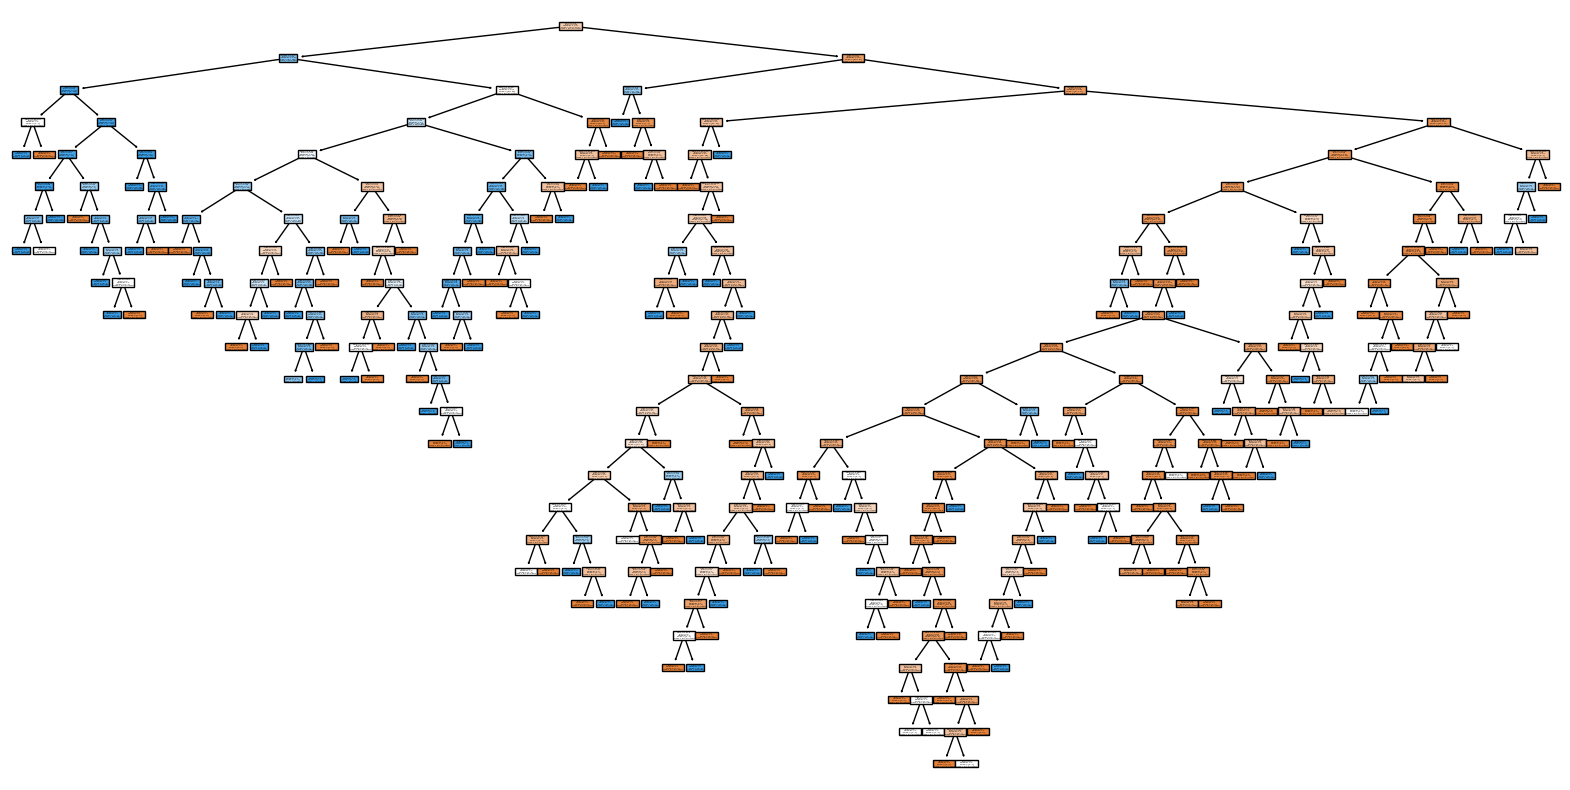

In [3]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

# Comentário sobre dois nós (feito manualmente com base na árvore gerada)

### 3. Avalie o desempenho no teste

In [4]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.2f}")

Acurácia no conjunto de teste: 0.73


### 4. Ajuste max_depth, min_samples_split, min_samples_leaf

In [5]:
clf_adjusted = DecisionTreeClassifier(max_depth=4, min_samples_split=10, min_samples_leaf=5, random_state=42)
clf_adjusted.fit(X_train, y_train)

# Avaliação
y_pred_adjusted = clf_adjusted.predict(X_test)
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
print(f"Acurácia ajustada: {accuracy_adjusted:.2f}")

Acurácia ajustada: 0.80


### 5. Altere critério para entropy e compare

In [6]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

y_pred_entropy = clf_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Acurácia com entropy: {accuracy_entropy:.2f}")

Acurácia com entropy: 0.78


### 6. Compare árvore com KNN e regressão logística

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print(f"Acurácia KNN: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"Acurácia Regressão Logística: {accuracy_score(y_test, y_pred_logreg):.2f}")

Acurácia KNN: 0.69
Acurácia Regressão Logística: 0.79


### 7. Ajuste ccp_alpha usando validação cruzada

In [8]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
alphas = path.ccp_alphas[:-1]

scores = []
for alpha in alphas:
    clf_alpha = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    score = cross_val_score(clf_alpha, X_train, y_train, cv=5).mean()
    scores.append(score)

# Melhor alpha
best_alpha = alphas[scores.index(max(scores))]
print(f"Melhor ccp_alpha encontrado: {best_alpha:.5f}")

# Treinar árvore podada
clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
clf_pruned.fit(X_train, y_train)
y_pred_pruned = clf_pruned.predict(X_test)
print(f"Acurácia árvore podada: {accuracy_score(y_test, y_pred_pruned):.2f}")

Melhor ccp_alpha encontrado: 0.00412
Acurácia árvore podada: 0.80


### 8. Compare estabilidade (desvio padrão das validações)

In [9]:
# Sem pruning
clf_unpruned = DecisionTreeClassifier(random_state=42)
scores_unpruned = cross_val_score(clf_unpruned, X_train, y_train, cv=5)

# Com pruning
clf_pruned_cv = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
scores_pruned = cross_val_score(clf_pruned_cv, X_train, y_train, cv=5)

print(f"Desvio padrão sem pruning: {np.std(scores_unpruned):.4f}")
print(f"Desvio padrão com pruning: {np.std(scores_pruned):.4f}")

Desvio padrão sem pruning: 0.0294
Desvio padrão com pruning: 0.0136
